# Hey, there.... 

In [1]:
#I'm going to try and explain a little bit of data cleaning and visualisation, hope it helps!

# Remove Warnings

In [2]:
#use this to get rid of any warnings you may face.

import warnings
warnings.simplefilter("ignore")

# Libraries

In [3]:
#importing the libraries that we're gonna use
#ps:uou can download a libirary simply by runing this command in your cmd portal---> pip install (name of the library)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from fuzzywuzzy import fuzz, process

# Figure size

In [4]:
#we use this to control the size of the figure in the visualisation part, you can control it the way you like.
from matplotlib import rcParams
rcParams['figure.figsize'] = (6,6)

# Extract data & view it 

In [5]:
#I'm gonna use Candy data which is from a candy survey, fell free to use any data set you like.
#ps:just remember to use the right form of your file such as here we use ".xlsx" cuase it's an excel file.

candy = pd.read_excel('candy.xlsx')

In [6]:
#viewing the coulmns names.

candy.columns

Index(['Internal ID', 'Q1: GOING OUT?', 'Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY',
       'Q5: STATE, PROVINCE, COUNTY, ETC', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       ...
       'Q8: DESPAIR OTHER', 'Q9: OTHER COMMENTS', 'Q10: DRESS', 'Unnamed: 113',
       'Q11: DAY', 'Q12: MEDIA [Daily Dish]', 'Q12: MEDIA [Science]',
       'Q12: MEDIA [ESPN]', 'Q12: MEDIA [Yahoo]', 'Click Coordinates (x, y)'],
      dtype='object', length=120)

In [7]:
#the data from the survey
candy

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,90314359,No,Male,24,USA,MD,JOY,DESPAIR,MEH,DESPAIR,...,Fruit Stripe Gum,NaN,White and gold,NaN,Friday,NaN,NaN,NaN,NaN,NaN
2456,90314580,No,Female,33,USA,New York,MEH,DESPAIR,JOY,NaN,...,Capers,NaN,Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 26)"
2457,90314634,No,Female,26,USA,Tennessee,MEH,DESPAIR,JOY,DESPAIR,...,NaN,NaN,Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(67, 35)"
2458,90314658,No,Male,58,Usa,North Carolina,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data shape & info

In [8]:
#getting to know your data better   shape--->(rows, columns)

candy.shape

(2460, 120)

In [9]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 120 entries, Internal ID to Click Coordinates (x, y)
dtypes: float64(4), int64(1), object(115)
memory usage: 2.3+ MB


# Check Duplication & show data statistics  

In [10]:
candy.duplicated().sum()

0

In [11]:
candy.describe()

,Internal ID,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo]
count,2.460000e+03,85.0,1362.0,99.0,67.0
mean,9.028016e+07,1.0,1.0,1.0,1.0
std,7.435532e+03,0.0,0.0,0.0,0.0
min,9.025877e+07,1.0,1.0,1.0,1.0
25%,9.027520e+07,1.0,1.0,1.0,1.0
50%,9.027780e+07,1.0,1.0,1.0,1.0
75%,9.028242e+07,1.0,1.0,1.0,1.0
max,9.031480e+07,1.0,1.0,1.0,1.0


# Check Nan Values 

In [12]:
#NaN represents missing or undefined data

candy.isna().sum()

Internal ID                    0
Q1: GOING OUT?               110
Q2: GENDER                    41
Q3: AGE                       84
Q4: COUNTRY                   64
                            ... 
Q12: MEDIA [Daily Dish]     2375
Q12: MEDIA [Science]        1098
Q12: MEDIA [ESPN]           2361
Q12: MEDIA [Yahoo]          2393
Click Coordinates (x, y)     855
Length: 120, dtype: int64

In [13]:
#here we drop the columns with a high NaN values for example we drop (Internal id) as the data alreday has an index
#(Unnamed: 113) for having too much NaN values.
#than we put a copy from the data into another data frame and start cleaning
#“axis 0” represents rows and “axis 1” represents columns. 

df = candy.drop(['Internal ID','Unnamed: 113'],axis=1)

# Now we clean some coulmns from NaN values

# GOING OUT? before cleaning

In [14]:
# reprsent the column, we can see there is many NaN values
df['Q1: GOING OUT?']

0       NaN
1        No
2       NaN
3        No
4        No
       ... 
2455     No
2456     No
2457     No
2458     No
2459     No
Name: Q1: GOING OUT?, Length: 2460, dtype: object

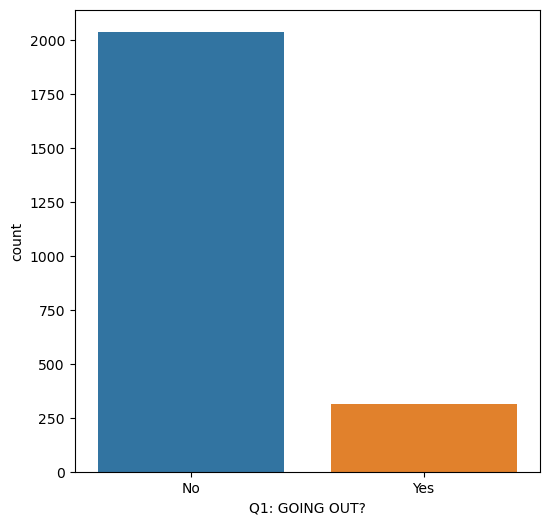

In [15]:
#visualisation of the column before cleaning
sns.countplot(x='Q1: GOING OUT?',data=df)
plt.show()

# GOING OUT? after cleaning

In [16]:
#here we are going to replace the NaN values with somthin to represent it such as "I don't know"
#The 'inplace=True' argument stands for the data frame has to make changes permanent

df['Q1: GOING OUT?'].fillna("I don't Know",inplace=True)

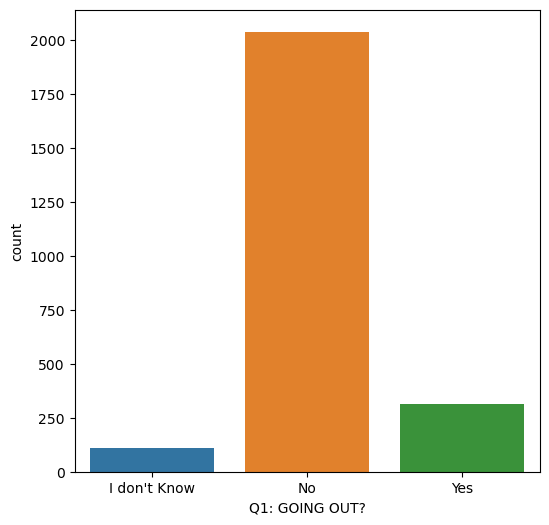

In [17]:
#visualisation of the column after cleaning

sns.countplot(x='Q1: GOING OUT?',data=df)
plt.show()

# GENDER before cleaning
 same as the one before

In [18]:
df['Q2: GENDER']

0          NaN
1         Male
2         Male
3         Male
4         Male
         ...  
2455      Male
2456    Female
2457    Female
2458      Male
2459    Female
Name: Q2: GENDER, Length: 2460, dtype: object

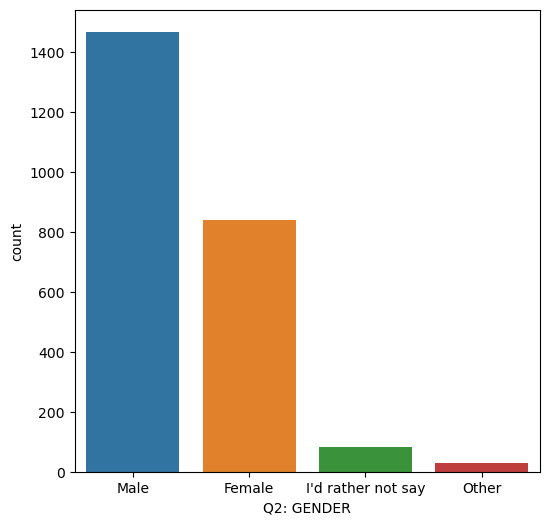

In [19]:
sns.countplot(x='Q2: GENDER',data=df)
plt.show()

# GENDER after cleaning

In [20]:
df['Q2: GENDER'].fillna("Unknwon",inplace=True)

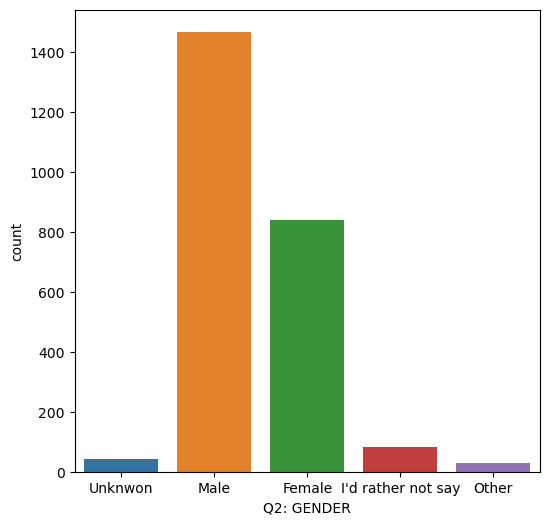

In [21]:
sns.countplot(x='Q2: GENDER',data=df)
plt.show()

# AGE before cleaning

In [22]:
#we have unique values here which could be string or any other value that doesn't represnt the age column
df['Q3: AGE'].describe()

count     2376
unique     106
top         40
freq        92
Name: Q3: AGE, dtype: int64

In [23]:
#so we use here "to_numeric" to make the unique values ---> NaN values
df['Q3: AGE'] = pd.to_numeric(df['Q3: AGE'], errors='coerce')

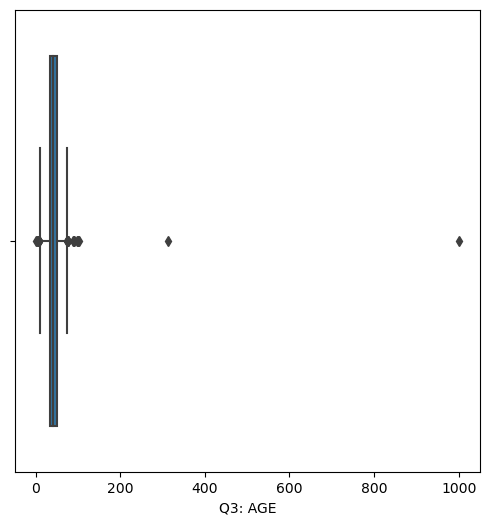

In [24]:
#as you can see here we have outliers with age 1000 which is not real
sns.boxplot(x='Q3: AGE',data=df)
plt.show()

# AGE after cleaning

In [25]:
#here we give a range of expected age which is from (0, 80) other than that it may be NaN value

df['Q3: AGE'][df['Q3: AGE'] > 80] = np.nan
df['Q3: AGE'][df['Q3: AGE'] < 0] = np.nan

In [26]:
#than we we get the mean of the ages we have and round it to get an integer wich in taht case will be "42"
impute = int(np.round(df['Q3: AGE'].mean()))
impute

42

In [27]:
#than replace every NaN value with the mean "42"
df['Q3: AGE'].fillna(impute,inplace=True)

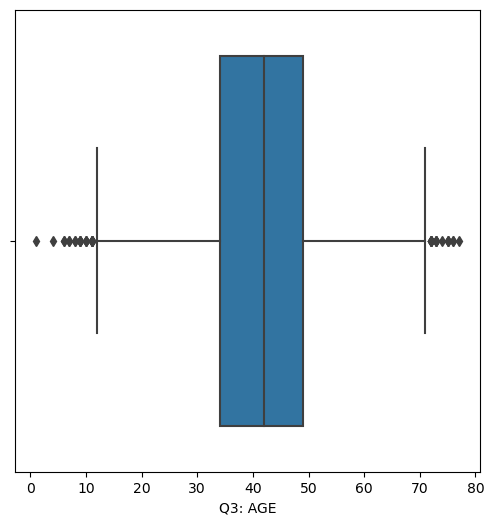

In [28]:
#no more outliers with 1000 age which makes no sense.
sns.boxplot(x='Q3: AGE',data=df)
plt.show()

# DAY before cleaning

In [29]:
df['Q11: DAY']

0          NaN
1       Sunday
2          NaN
3       Sunday
4       Friday
         ...  
2455    Friday
2456    Friday
2457    Friday
2458       NaN
2459    Sunday
Name: Q11: DAY, Length: 2460, dtype: object

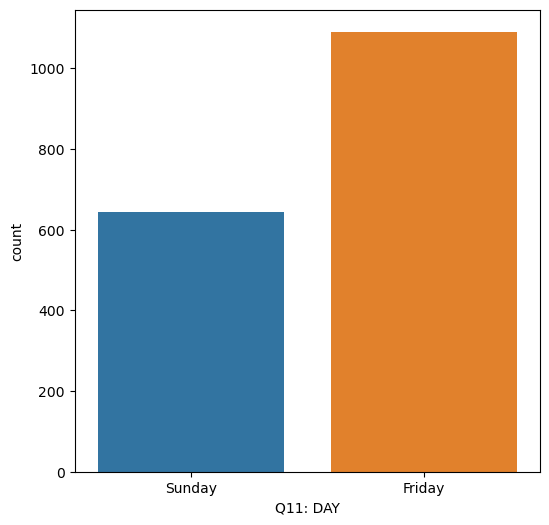

In [30]:
sns.countplot(x='Q11: DAY',data=df)
plt.show()

# DAY after cleaning

In [31]:
#here we use the mode as we the days are finite amount of data that will be repeated
#the mode here is "Friday"
df['Q11: DAY'].mode()

0    Friday
Name: Q11: DAY, dtype: object

In [32]:
#replace NaN values with the mean
df['Q11: DAY'].fillna("Friday",inplace = True)

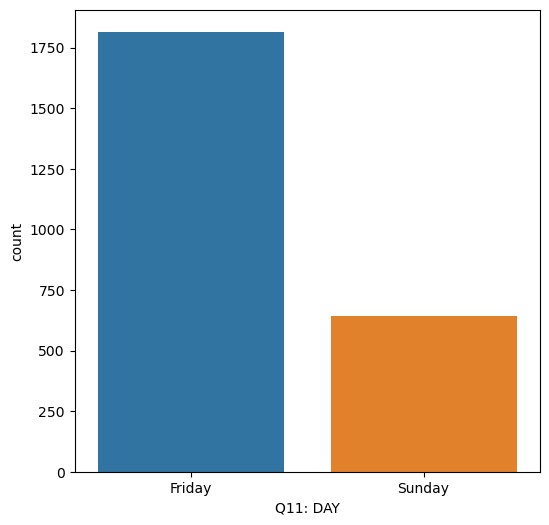

In [33]:
#no more NaN values
sns.countplot(x='Q11: DAY',data=df)
plt.show()

# COUNTRY before cleaning

In [34]:
df['Q4: COUNTRY']

0        NaN
1       USA 
2        USA
3         us
4        usa
        ... 
2455     USA
2456     USA
2457    USA 
2458     Usa
2459     usa
Name: Q4: COUNTRY, Length: 2460, dtype: object

# COUNTRY after cleaning

In [35]:
#get unique values
df['Q4: COUNTRY'].unique()

array([nan, 'USA ', 'USA', 'us', 'usa', 'canada', 'Canada', 'Us', 'US',
       'Murica', 'United States', 'uk', 'United Kingdom', 'united states',
       'Usa', 'United States ', 'United staes',
       'United States of America', 'UAE', 'England', 'UK', 'canada ',
       'Mexico', 'United states', 'u.s.a.', 'USAUSAUSA', 'america', 35,
       'france', 'United States of America ', 'U.S.A.', 'finland',
       'unhinged states', 'Canada ', 'united states of america',
       'US of A', 'Unites States', 'The United States', 'North Carolina ',
       'Unied States', 'Netherlands', 'germany', 'Europe', 'Earth', 'U S',
       'u.s.', 'U.K. ', 'Costa Rica', 'The United States of America',
       'unite states', 'U.S.', 46, 'cascadia', 'Australia',
       'insanity lately', 'Greece', 'USA? Hard to tell anymore..',
       "'merica", 'usas', 'Pittsburgh', 45, 'United State', 32, 'France',
       'australia', 'A', 'Can', 'Canae', 'New York', 'Trumpistan',
       'Ireland', 'United Sates', 'Korea', 

In [36]:
#fuzzy wuzzy, give this one a search kinda hard to explane in a comment :) 

df['Q4: COUNTRY'] = df['Q4: COUNTRY'].str.strip().str. lower()

countries = pd.Series(['usa', 'united states','america','china','spain','Egypt','England'])

for country in countries:
    matches = process.extract(country, df['Q4: COUNTRY'], limit = df.shape[0])
    for potential_match in matches:
        if potential_match[1]>=80:
            df.loc[df['Q4: COUNTRY'] == potential_match[0],'Q4: COUNTRY'] = country

df['Q4: COUNTRY'].unique()

array([nan, 'usa', 'canada', 'murica', 'united states', 'uk',
       'united kingdom', 'uae', 'England', 'mexico', 'u.s.a.', 'america',
       'france', 'finland', 'us of a', 'north carolina', 'netherlands',
       'germany', 'europe', 'earth', 'u.k.', 'costa rica', 'cascadia',
       'australia', 'insanity lately', 'greece',
       'usa? hard to tell anymore..', 'pittsburgh', 'can', 'canae',
       'new york', 'trumpistan', 'ireland', 'korea', 'california',
       'japan', 'south africa', 'iceland', 'canada`', 'scotland',
       'denmark', 'switzerland', 'ud', 'south korea', 'new jersey',
       'indonesia', 'the netherlands', 'atlantis', 'murrika', 'alaska',
       'soviet canuckistan', 'singapore', 'china', 'taiwan', 'hong kong',
       'spain', 'sweden', 'narnia', 'u s a',
       'subscribe to dm4uz3 on youtube', "i don't know anymore",
       'fear and loathing'], dtype=object)

In [37]:
mapping = {'united states':'usa','america':'usa'}
df['Q4: COUNTRY'].replace(mapping, inplace=True)
df['Q4: COUNTRY'].unique()

array([nan, 'usa', 'canada', 'murica', 'uk', 'united kingdom', 'uae',
       'England', 'mexico', 'u.s.a.', 'france', 'finland', 'us of a',
       'north carolina', 'netherlands', 'germany', 'europe', 'earth',
       'u.k.', 'costa rica', 'cascadia', 'australia', 'insanity lately',
       'greece', 'usa? hard to tell anymore..', 'pittsburgh', 'can',
       'canae', 'new york', 'trumpistan', 'ireland', 'korea',
       'california', 'japan', 'south africa', 'iceland', 'canada`',
       'scotland', 'denmark', 'switzerland', 'ud', 'south korea',
       'new jersey', 'indonesia', 'the netherlands', 'atlantis',
       'murrika', 'alaska', 'soviet canuckistan', 'singapore', 'china',
       'taiwan', 'hong kong', 'spain', 'sweden', 'narnia', 'u s a',
       'subscribe to dm4uz3 on youtube', "i don't know anymore",
       'fear and loathing'], dtype=object)

In [38]:
df['Q4: COUNTRY'].isna().sum()

69

In [39]:
df['Q4: COUNTRY'].fillna("Unknwon",inplace=True)

# DRESS before cleaning
 same as first two columns

In [40]:
df['Q10: DRESS']

0                  NaN
1       White and gold
2                  NaN
3       White and gold
4       White and gold
             ...      
2455    White and gold
2456    Blue and black
2457    Blue and black
2458               NaN
2459    White and gold
Name: Q10: DRESS, Length: 2460, dtype: object

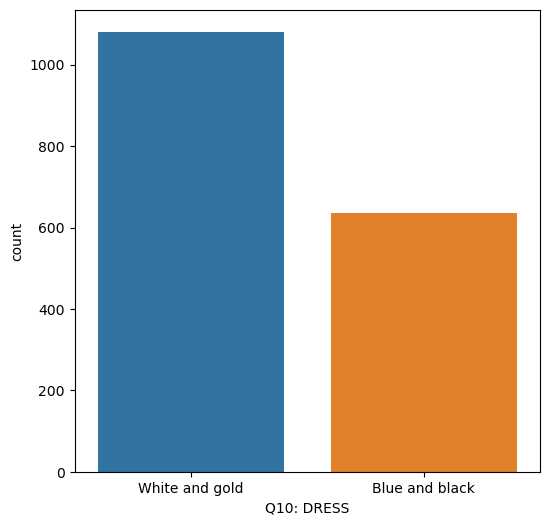

In [41]:
sns.countplot(x='Q10: DRESS',data=df)
plt.show()

# DRESS after cleaning

In [42]:
df['Q10: DRESS'].fillna("Unknwon",inplace=True)

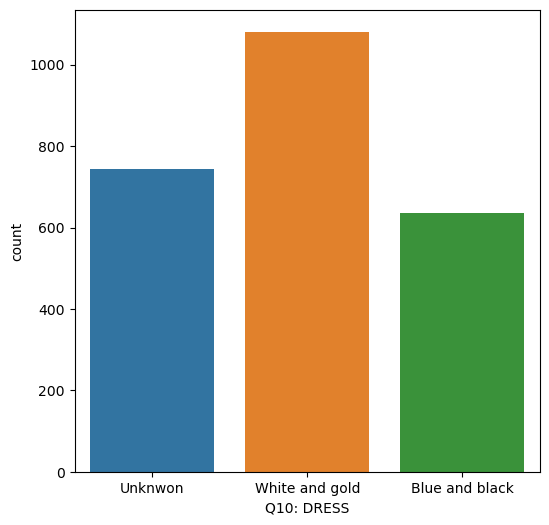

In [43]:
sns.countplot(x='Q10: DRESS',data=df)
plt.show()

# Q6 before cleaning
 Here we gonna use the mode as Days cloumn

In [44]:
df['Q6 | 100 Grand Bar']

0           NaN
1           MEH
2           NaN
3           MEH
4           JOY
         ...   
2455        JOY
2456        MEH
2457        MEH
2458        NaN
2459    DESPAIR
Name: Q6 | 100 Grand Bar, Length: 2460, dtype: object

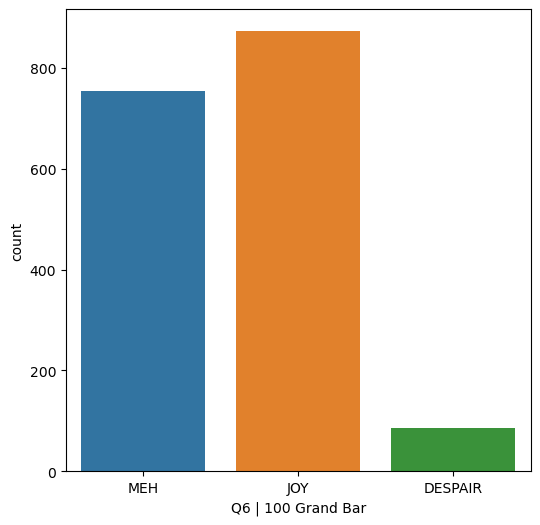

In [45]:
sns.countplot(x='Q6 | 100 Grand Bar',data=df)
plt.show()

In [46]:
df['Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)']

0           NaN
1       DESPAIR
2           NaN
3       DESPAIR
4       DESPAIR
         ...   
2455    DESPAIR
2456    DESPAIR
2457    DESPAIR
2458        NaN
2459    DESPAIR
Name: Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes), Length: 2460, dtype: object

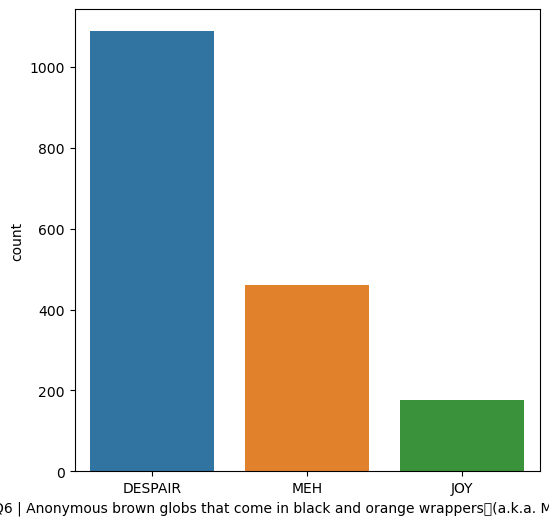

In [47]:
sns.countplot(x='Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',data=df)
plt.show()

In [48]:
df['Q6 | Any full-sized candy bar']

0       NaN
1       JOY
2       NaN
3       JOY
4       JOY
       ... 
2455    MEH
2456    JOY
2457    JOY
2458    NaN
2459    JOY
Name: Q6 | Any full-sized candy bar, Length: 2460, dtype: object

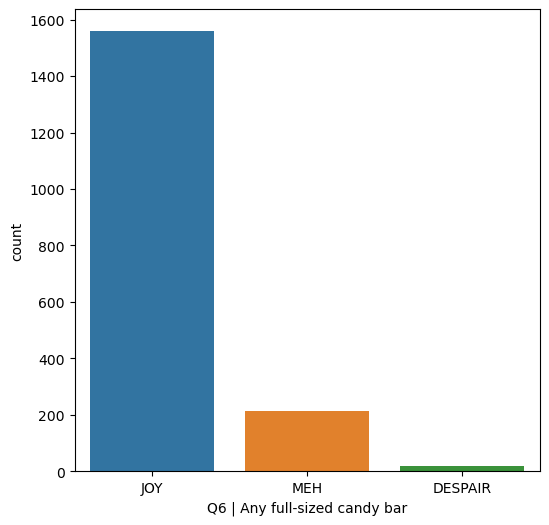

In [49]:
sns.countplot(x='Q6 | Any full-sized candy bar',data=df)
plt.show()

In [50]:
df['Q6 | Black Jacks']

0           NaN
1           MEH
2           NaN
3           MEH
4       DESPAIR
         ...   
2455    DESPAIR
2456        NaN
2457    DESPAIR
2458        NaN
2459    DESPAIR
Name: Q6 | Black Jacks, Length: 2460, dtype: object

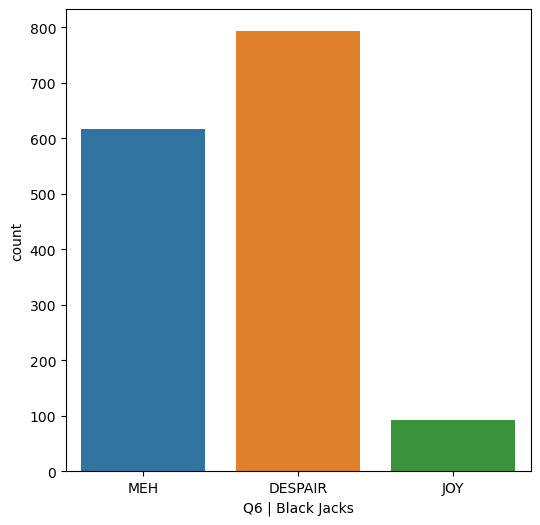

In [51]:
sns.countplot(x='Q6 | Black Jacks',data=df)
plt.show()

# Q6 after cleaning

In [52]:
df['Q6 | 100 Grand Bar'].mode()

0    JOY
Name: Q6 | 100 Grand Bar, dtype: object

In [53]:
df['Q6 | 100 Grand Bar'].fillna("JOY",inplace = True)

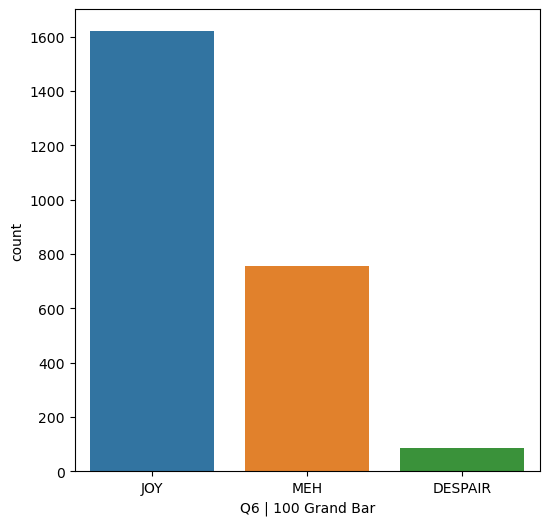

In [54]:
sns.countplot(x='Q6 | 100 Grand Bar',data=df)
plt.show()

In [55]:
 df['Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)'].mode()

0    DESPAIR
Name: Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes), dtype: object

In [56]:
df['Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)'].fillna("DESPAIR",inplace = True)

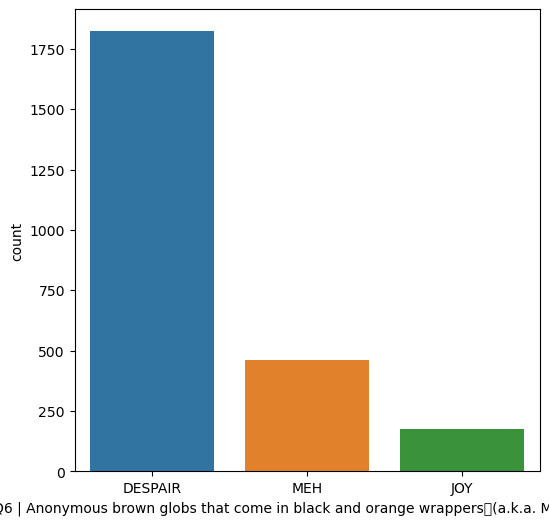

In [57]:
sns.countplot(x='Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',data=df)
plt.show()

In [58]:
 df['Q6 | Any full-sized candy bar'].mode()

0    JOY
Name: Q6 | Any full-sized candy bar, dtype: object

In [59]:
df['Q6 | Any full-sized candy bar'].fillna("JOY",inplace = True)

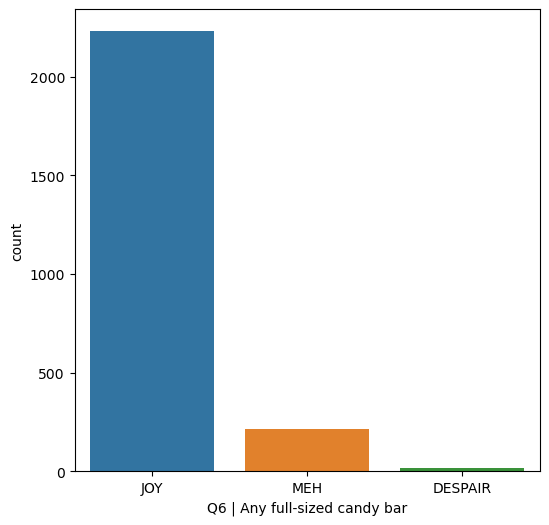

In [60]:
sns.countplot(x='Q6 | Any full-sized candy bar',data=df)
plt.show()

In [61]:
df['Q6 | Black Jacks'].mode()

0    DESPAIR
Name: Q6 | Black Jacks, dtype: object

In [62]:
df['Q6 | Black Jacks'].fillna("DESPAIR",inplace = True)

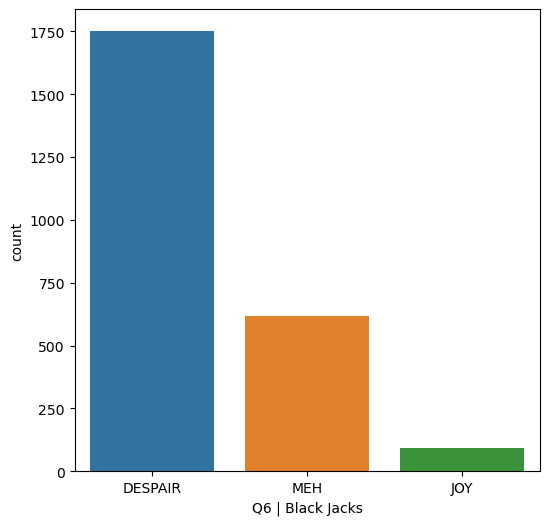

In [63]:
sns.countplot(x='Q6 | Black Jacks',data=df)
plt.show()

In [64]:
#as you can see we got rid of the most NaN values wihch will make the data more sutable and utilized for other use.
df.isna().sum()

Q1: GOING OUT?                         0
Q2: GENDER                             0
Q3: AGE                                0
Q4: COUNTRY                            0
Q5: STATE, PROVINCE, COUNTY, ETC     100
                                    ... 
Q12: MEDIA [Daily Dish]             2375
Q12: MEDIA [Science]                1098
Q12: MEDIA [ESPN]                   2361
Q12: MEDIA [Yahoo]                  2393
Click Coordinates (x, y)             855
Length: 118, dtype: int64

# Thanks!!
 if you reach the end thanks for reading, hope this notbook helped you :)